## Gradient based optimization

Each dense layer from the MNIST example transforms its input data as follows:

$output = activation(dot(W, input) + b)$

In this expression, $W$ and $b$ are the **trainable parameters** of the model. 

Initially these parameters are filled with **small random values**. Obviously the model will not predict anything useful in this state.

During training the parameters are gradually adjusted to improve the performance of the model.

To be able to train a model we need to wrap it in a **loss function**. The loss function returns a single positive value and measures how good the model is in predicting labels. 

A loss function is also called cost function or error function.

In summary: Optimizing a model means to minimize the value returned by the loss function given a set of examples. This is achived by updating the model parameters in an iterative process.


## Train process

Lets assume we have a set of observed examples with associated labels.

Model training in general executes the following loop:

 1. Draw a batch of training samples $x$ and corresponding labels $y$
 2. Run the model on $x$ to obtain predictions $\hat y$
 3. Compute the loss of the model on the batch, a measure of the mismatch between $\hat y$ and $y$
 4. Update all parameters of the model in a way that slightly reduces the loss on this batch
 
The training will eventually end up with a model that has a very low loss on its training data. 

The interesting part of the training loop is step 4: the parameter update.

How can we update the individual parameters of the model to reduce the loss and get better predictions? 

We'll take advantage of the fact that all model operations are differentiable, and compute the gradient of the loss function with respect to the model's parameters. 

You can then move the parameters in the opposite direction from the gradient, thus decreasing the loss.

## What is a gradient?

Consider a continuous, smooth function $f(x) = y$, mapping a real number x to a real number y.

The derivative of $f(x)$ is written as: 

$$f'(x) = \frac{d}{dx}f(x) = \frac{d f(x)}{dx}$$

$\frac{d}{dx}$ is called the **differential operator**. 

You can think of $\frac{d f(x)}{dx}$ as an operator that maps a function of one parameter to the derivative of the function.

The value of $\frac{d f(x)}{dx}$ is simply the **slope** of $f(x)$ at some given point $x=p$.


The derivative tells us how the value of $f(x)$ changes if we change $p$.


If the derivative is **negative**, it means a small change of x around p will result in a decrease of f(x). 

If the derivative is **positive**, a small change in x will result in an increase of f(x). 

Further, the absolute value of the derivative tells you how quickly this increase or decrease will happen.

Lets look at a simple example $f(x) = x^2 + 3x$

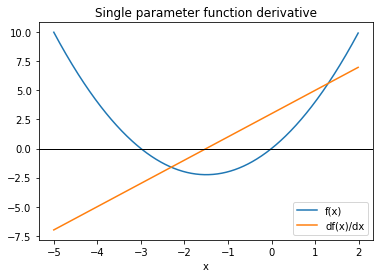

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x**2 + 3 * x
def df_dx(x): return 2 * x + 3

x= np.arange(-5, 2, 0.01)
plt.title('Single parameter function derivative')
plt.xlabel('x')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df_dx(x), label='df(x)/dx')
plt.axhline(linewidth=1, color='black')
plt.legend()
plt.show()

Lets consider the case when a function $f(x_1, x_2)$ has multiple input variables.

In this case each input variable contributes to the value of the function and it does not make sense to have a single derivative for the function. 

Instead we compute derivatives with respect to one variable at a time, these are called **partial derivatives**.

Instead of using the differential operator $\frac{d}{dx}$, we use the **partial differential operator** $ \frac{\partial}{\partial x}$.

For a function $f(x_1, x_2)$ the partial derivatives are $\frac{\partial}{\partial x_1}f(x)$ and $\frac{\partial}{\partial x_2}f(x)$. 

The partial derivative with respect to $x_i$ is calculated just like the derivative for a single variable function, simply treating any other variables in the equation as a constant.

The partial derivative w.r.t $x_i$ tells us how the value of $f(x_1, x_2)$ will change if we change $x_i$ a little bit.

The vector of partial derivatives is called the **gradient** of $f(x_1, x_2)$:

$$
\nabla f(x_1,x_2) = \left [ \frac{\partial f(x_1,x_2)}{\partial x_1}, \frac{\partial f(x_1,x_2)}{\partial x_2} \right ]
$$

The $\nabla$ is called the Nabla operator.

In machine learning most of the time we use functions that take vectors or matrics as input. So instead of functions with scalar variables like $f(x_1, x_2)$ we use something like $f(x)$ where x is a vector $x=[x_1, x_2]$. 

The gradient of $f(x)$ looks like this:

$$
\nabla f(x) = \left [ \frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2} \right ]
$$

**Note:** Using functions that take tensors as input has a number of advantages. The functions become more generic because they can take an arbitrary number of inputs. More importantly the tensor representation allows parallel computation by using vectorized operations in CPUs and GPUs.

Lets look at a simple example  $f(x)=x_1^2 + x_2^2$

In [2]:
import numpy as np

def f(x): 
    return x[0]**2 + x[1]**2

def grad_f(x): 
    df_dx1 = 2 * x[0]
    df_dx2 = 2 * x[1]
    return np.array([df_dx1, df_dx2])

## Gradient descent algorithm

**TODO** give some motivation for GD

The gradient is a vector that points into the direction of greatest increase of $f(x)$. 

To minimize $f(x)$ (e.g. finding the $x$ where $f(x)$ is minimal) all we need to do is to take a small step in the direction of the **negative gradient**. We repeat this until the value of $f(x)$ does not change any more.

Its important to only take a small step because the gradient is only a good approximation of $f(x)$ in its immediate surrounding.

Formally we apply the following **update rule** in each iteration to find the $x$ that minimizes $f(x)$:

$$
x_n = x_{n-1} - \alpha \ \nabla f(x)
$$

$\alpha$ is called the learning rate, it controls the size of step we take in each iteration.

Lets look at a simple function $f(x) = x_0^2 + x_1^3 + 3$. The function is convex and has a global minimum as $x=[0,0]$.

Final x=[0.0095219  0.00115217]
Final f(x)=3.000091


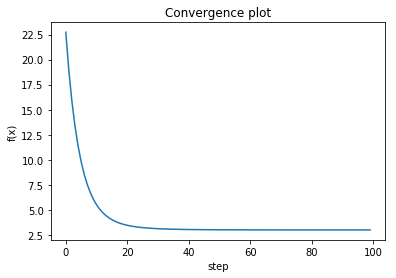

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# f(x) is the function we want to minimize
def f(x):
    return x[0]**2 + x[1]**3 + 3

# Gradient of f(x)
def grad_f(x):
    return np.array([2 * x[0], 3 * x[1]])

max_steps = 100
alpha = 0.025
initial_x = np.random.rand(2) * 5.0 # initialize x_0 random

x = initial_x
f_hist = []
for step in range(max_steps):
    x = x - alpha * grad_f(x) # update rule
    f_hist.append(f(x))
print('Final x=%s' % x)
print('Final f(x)=%f' % f(x))

plt.title('Convergence plot')
plt.xlabel('step')
plt.ylabel('f(x)')
plt.plot(f_hist)
plt.show()


You can see from the plot that at some step the value of $f(x)$ does not change any more, the process has converged.

This algorithm is called **Gradient Descent**. 

The implementation in the example is pretty simple. State-of-the-art implementation are highly optimized and take advantage of hardware accelerators like vectorized CPU operations, GPUs or TPUs.

$\alpha$ is called the **learning rate**. 

The learning rate has a huge influence on training time and prediction performance. If not set properly the training process might take very longer or may not converge at all. The value is usually set in the range 0.01 to 0.0001

For convex functions with a reasonable leraning rate gradient descent is guaranteed to find the global minimum. For non-convex functions gradient descent is guaranteed to find a local minimum.

Neuronal networks are non-convex functions that often have millions of local minima. In practice gradient descent does a good job in optimizing models.

When training a model $f(x)$ we have two sets of arguments that determine the result:
 * the input example $x$
 * the model weights and bias terms
 
Lets define $\theta = \{w_0, b_0,...,w_k, b_k\}$ as collection of all weights and bias terms.
 
Further we do not directly optimize the model function $f(x)$ but instead a loss function $L(x, y, \theta)$ that wraps the model.

When minimizing the loss we can only change the values in $\theta$, $x$ and $y$ are observations that are immutable.

To train the model we perform the following steps:

 1. Initialize $\theta$ with small random values
 2. Sample an example $x$ and $y$ and calculate $\hat y = f(x)$
 3. Calculate the partial derivatives of the loss function w.r.t. $\theta$
 4. Update all parameters in $\theta$ according to the update rule $\theta_{n+1} = \theta_{n} - \alpha \nabla_\theta L(x_i, y_i;\theta_{n})$
 5. Repeat from step 2 until loss change stays below some threshold

## Learning rate

This is a cartoon depicting the effects of different learning rates:

<img src="images/cartoon_loss.png" height="300" width="400"/>

 * With a low learning rate (blue line) the loss will decrease slowly because the parameter updates are very small
 * High learning rates (green line) will decay the loss faster, but they get stuck at worse values of loss. This is because there is too much "energy" in the optimization and the parameters are bouncing around chaotically, unable to settle in a deep spot in the optimization landscape.
 * With very high learning rate (yellow line) the loss may even grow exponentially

One simple solution is to anneal the learning rate over time. Starting with a high learning rate helps to speed up the learning progress early on and reducing it over time helps to settle down into deeper but narrower parts of the loss function.

Another solution is to use a more sophisticated optimization algorithm like:

 * Adam
 * Adagrad
 * RMSProp


## Variations of Gradient Descent

Assume we draw a random batch $x = [x_1,...,x_m]$ of size $m$ from the training dataset.

$$
\theta_{n+1} = \theta_{n} - \alpha \frac{1}{m} \sum_{i=1}^m \nabla_\theta L(x_i, y_i;\theta_{n})
$$

 * Stochastic GD: m=1, high parameter update rate, gradients are very noisy and parameter updates are not very accurate, large jumps in the loss landscape, algorithm might not converge
 * Batch SGD: m=n, correct gradient leads to precise parameter updates, but very low parameter update frequency, conversion might take very long.
 * Mini-batch SGD: compromise between stochastic GD and batch GD, batch size is a hyper parameter

---

This is called mini-batch stochastic gradient descent (mini-batch SGD). The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a fency word for random).

Note that a variant of the mini-batch SGD algorithm would be to draw a single sample and target at each iteration, rather than drawing a batch of data. This would be true SGD (as opposed to mini-batch SGD). Alternatively, going to the opposite extreme, you could run every step on all data available, which is called batch SGD. Each update would then be more accurate, but far more expensive. The efficient compromise between these two extremes is to use mini-batches of reasonable size.

